# Problem Statement

On a dataset comprising of the Length and Width of the Sepal and the Petal (in cm), using unsupervised machine learning algorithms, determine the class of the plant the particular observation belongs to.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('iris_dataset.csv')
df.shape

(150, 6)

In [45]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The "ID" attribute would be of no use for our prediction purpose as it is just the number assigned to an observation and not on the basis of a feature.

In [46]:
df.drop('Id', axis = 1, inplace = True)

# Exploratory Data Analysis

In [47]:
df.describe(include = 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [48]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
eda = pd.DataFrame(index = df.columns)
eda['Data Types'] = df.dtypes
eda['Null count'] = df.isnull().sum()
eda['unique_count'] = df.nunique()

In [50]:
eda

,Data Types,Null count,unique_count
SepalLengthCm,float64,0,35
SepalWidthCm,float64,0,23
PetalLengthCm,float64,0,43
PetalWidthCm,float64,0,22
Species,object,0,3


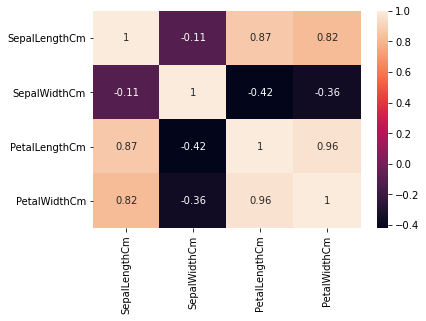

In [51]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Data Distribution graph

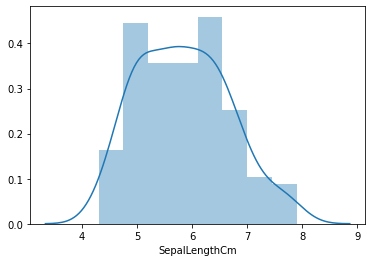

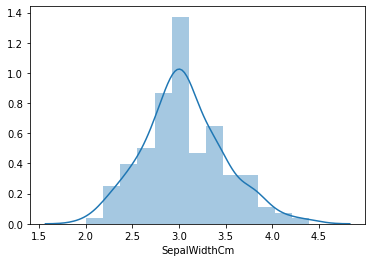

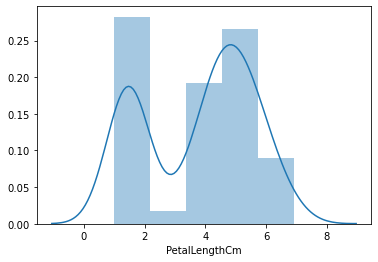

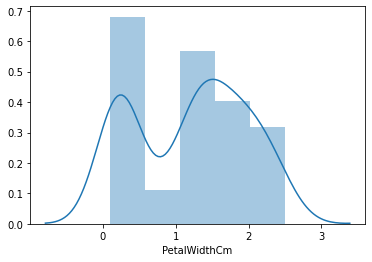

In [52]:
features = df._get_numeric_data().columns
for col in features:
    data = df.copy()
    sns.distplot(data[col])
    plt.show()

The data distribution is along a normal curve

## Boxplot

Visualizing the boxplots so as to look for outliers in the dataset.

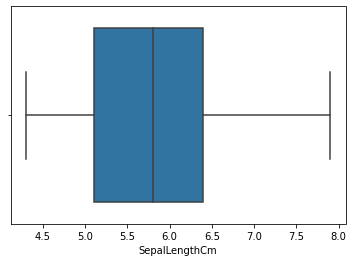

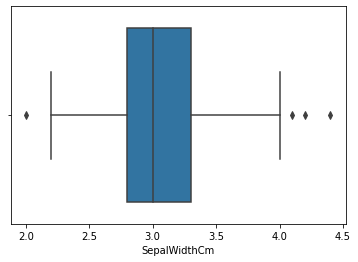

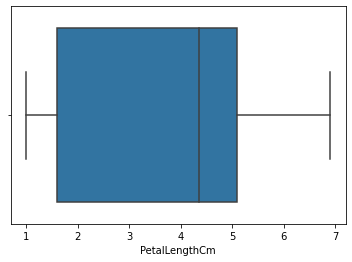

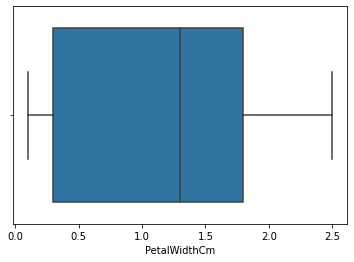

In [53]:
features = df._get_numeric_data().columns
for col in features:
    data = df.copy()
    sns.boxplot(data[col])
    plt.show()

the boxplots look fine with just a few outliers shown in the feature "SepalWidthCm". But they look OK !

## Feature Pair plot 

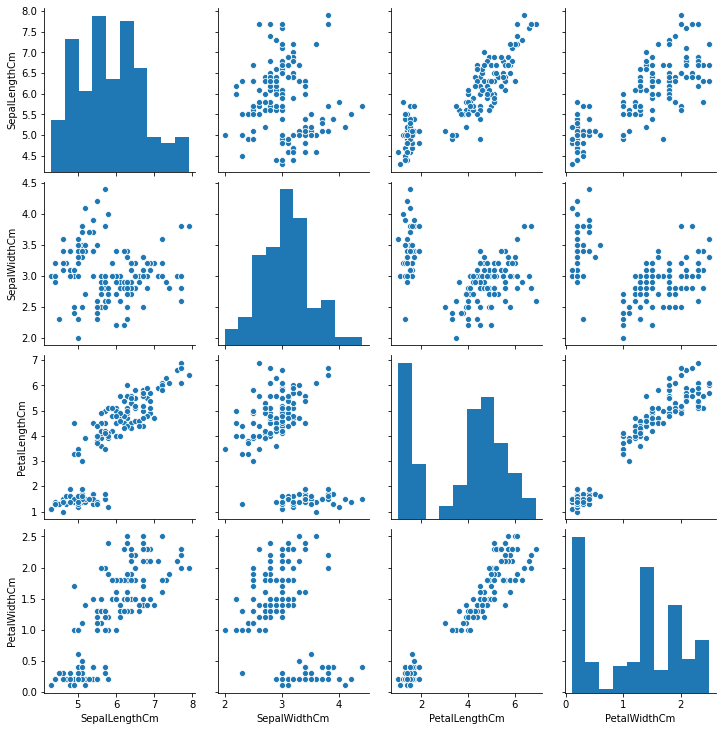

In [54]:
sns.pairplot(df)

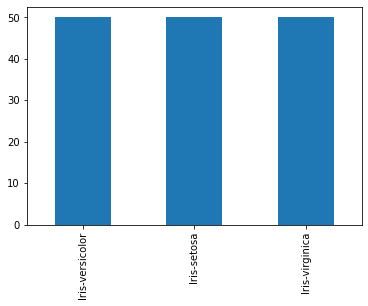

In [55]:
df['Species'].value_counts().plot(kind = 'bar')

All the three kinds of the species have the same number of observations (i.e 50 each)

# Predictive Modelling


In [57]:
from sklearn.cluster import KMeans

In [58]:
X = np.array(df.drop('Species', axis = 1))

## Elbow Curve

#### plotting the error vs number of clusters so as to identify the right number of clusters for prediction

In [65]:
def elbowCurve(k):

    err = []

    for i in range(1, k+1):
        km = KMeans(n_clusters = i, random_state = 0)
        km.fit(x)
        err.append(km.inertia_)
    
    plt.figure(figsize = (15,10))
    plt.plot(range(1, k+1), err, color = 'green', marker = '*')
    plt.title('Elbow Curve')
    plt.ylabel('Error')
    plt.xlabel('Number Of Clusters')
    plt.show()

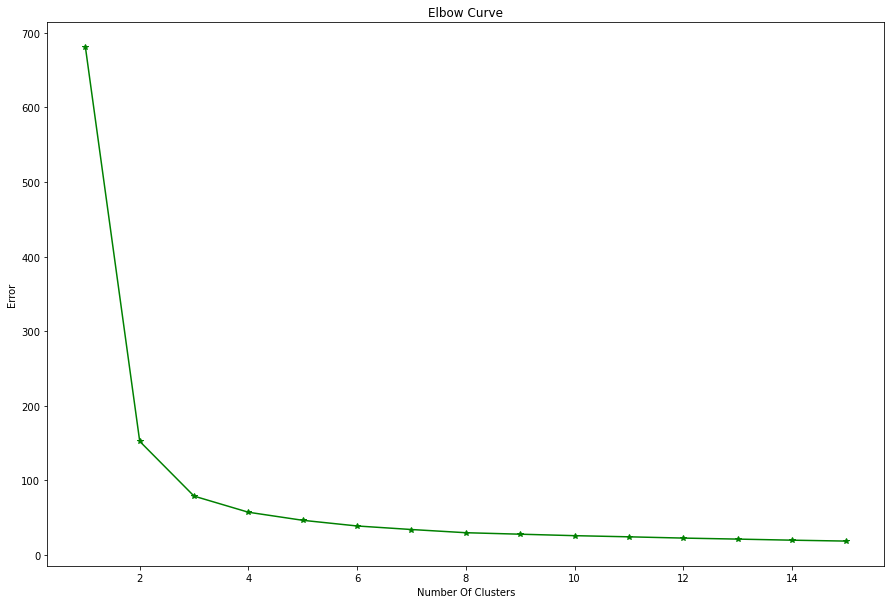

In [66]:
elbowCurve(15)

For Number_Of_Clusters = 3, the curve seems to be in a perfect elbow shape. Thus, we will choose n_clusters = 3.

Also, n = 3 should have been the answer as we have 3 types of classes in our dataset.

In [68]:
km = KMeans(n_clusters = 3, random_state = 0)
pred = km.fit_predict(x)

### Plotting the Clusters Alongwith the Cluster Centres

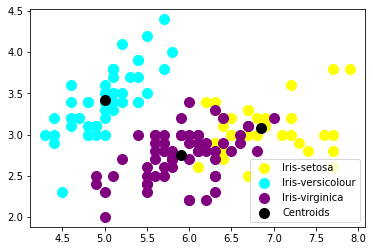

In [76]:
plt.scatter(x[pred == 0, 0],x[pred == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],s = 100, c = 'purple', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()